In [3]:
import requests
requests.

In [5]:
resp = requests.get('https://ya.ru')

'<!DOCTYPE html><html class="i-ua_js_no i-ua_css_standart i-ua_browser_unknown i-ua_browser_desktop i-ua_platform_other" lang="ru"><head xmlns:og="http://ogp.me/ns#"><meta http-equiv=Content-Type content="text/html;charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Яндекс</title><link rel="shortcut icon" href="//yastatic.net/iconostasis/_/8lFaTHLDzmsEZz-5XaQg9iTWZGE.png"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/5mdPq4V7ghRgzBvMkCaTzd2fjYg.png" sizes="76x76"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/s-hGoCQMUosTziuARBks08IUxmc.png" sizes="120x120"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/KnU823iWwj_vrPra7x9aQ-4yjRw.png" sizes="152x152"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/wT9gfGZZ80sP0VsoR6dgDyXJf2Y.png" sizes="180x180"><link rel="alternate" type="application/rss+xml" title="Новости Яндекса" href="https://yandex.ru/company/press_releases/news.rss"><link rel="alternate" 

In [23]:
resp = requests.get('https://api.hh.ru/vacancies/99')

In [24]:
resp.json()

{'id': '99',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Embedded OS engineering manager',
 'insider_interview': None,
 'response_letter_required': True,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 2000, 'currency': 'USD', 'gross': None},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': 'Embedded OS engineering manager  \r<br />\nVacancy opening at Samsung Electronics Research Center in Moscow. \r<br />\n\r<br />\nP o s i t i o n : Project Leader on full time basis \r<br />\n\r<br />\nQ u a l i f i c a t i o n : 4-5 year experience of work in embedded 

In [8]:
#per_page=100&page=2&text=
url1 = 'https://api.hh.ru/vacancies?specialization=1.221'

In [9]:
url2 = 'https://api.hh.ru/vacancies?specialization=13.228'

In [30]:
#tqdm
%time
searches = []
for page in range(20):
    searches.append(
        requests.get(url1 + '&page={}&per_page=100'.format(page)).json()
    )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


In [31]:
len(searches)

20

In [32]:
for page in range(20):
    searches.append(
        requests.get(url2 + '&page={}&per_page=100'.format(page)).json()
    )

In [27]:
searches[0]['items'][0]['url']

'https://api.hh.ru/vacancies/31101624?host=hh.ru'

In [33]:
vacs = [x['items'] for x in searches]
len(vacs)

40

In [34]:
[1]+[2]

[1, 2]

In [35]:
vacs = sum(vacs, [])
len(vacs)

4000

In [36]:
urls = [x['url'] for x in vacs]

In [45]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
!pip install tqdm

In [ ]:
vac_dicts = []
for url in tqdm(urls):
    vac_dicts.append(requests.get(url).json())
    if i%3 == 0:
        print(i)

In [ ]:
import pickle
with open('vac_dicts.pkl', 'wb') as f:
    pickle.dump(vac_dicts, f)

In [51]:
import os
os.listdir('/tmp/text-mining')

['Lect1_tf-idf.ipynb',
 'Lect2_text_mining.ipynb',
 'vac_dicts.zip',
 'Lect1_zipf.ipynb',
 'dostoevsky.txt']

In [52]:
import zipfile
zip_file = zipfile.ZipFile('/tmp/text-mining/vac_dicts.zip', 'r')
zip_file.extractall()
zip_file.close()

In [53]:
import pickle
with open('vac_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [55]:
data[0]['description']

'<p><strong>Крупнейший поставщик теплотехнического европейского оборудования на российский рынок приглашает Программиста</strong></p> <p><strong>Требования:</strong></p> <ul> <li>Профильное высшее образование;</li> <li>Желателен опыт работы в оптовых торговых организациях;</li> <li><strong>Практический опыт программирования на любом объектно-ориентированном языке программирования (Delphi подобном) от 3-х лет, например, Object Pascal или C++;</strong></li> <li>Практический опыт администрирования MS SQL Server, написания SQL запросов, Transact SQL;</li> <li>Опыт написания программ по работе с СУБД MS SQL Server, создание отчётов в Crystal Reports.</li> </ul> <p><strong>Обязанности:</strong></p> <ul> <li>Разработка нового функционала в корпоративной информационной системе;</li> <li>Написание новых модулей обмена данными со сторонними информационными системами;</li> <li>Создание новых отчетов.</li> </ul> <p><strong>Условия:</strong></p> <ul> <li>График работы понедельник-пятница 9:00-18:00

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from bs4 import BeautifulSoup
texts = []
for v in tqdm(data):
    texts.append(
        BeautifulSoup(v['description']).text
    )

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# http://pymorphy2.readthedocs.io/en/latest/_modules/pymorphy2/tokenizers.html

In [66]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)
def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace()]

In [61]:
' '.isspace()

True

In [62]:
import pymorphy2
m= pymorphy2.MorphAnalyzer()

In [63]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words if len(x) >= 4]

In [64]:
cv = CountVectorizer(tokenizer=token_r)

In [67]:
%%time
matrix = cv.fit_transform(texts).toarray()

CPU times: user 1min 44s, sys: 408 ms, total: 1min 44s
Wall time: 1min 44s


In [68]:
matrix.shape

(4000, 19161)

In [69]:
matrix[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
cos_m = cosine_similarity(matrix)

In [72]:
cos_m.shape

(4000, 4000)

In [ ]:
cos_m[0].argmin()

In [ ]:
from random import random

In [73]:
%matplotlib inline

In [74]:
from matplotlib import pyplot as plt

In [78]:
cos_m[0][2000:].argmax()

433

In [79]:
farm = texts[2000:]
farm[cos_m[0][2000:].argmax()]

'Обязанности:  Формирование потребности и работа с врачами; Осуществление госпитальных закупок; Взаимодействие с ключевыми лидерами мнений, главными специалистами; Проведение конференций, круглых столов. Ведение и предоставление отчетности.  Требования:  Высшее медицинское образование; Опыт работы в госпитальном бизнесе; Опыт работы в онкологии; Опыт работы в данной должности от 3 лет.  Условия:  Высокий уровень заработной платы; Бонусы; Корпоративный автомобиль; Социальный пакет. '

In [77]:
texts[0]

'Крупнейший поставщик теплотехнического европейского оборудования на российский рынок приглашает Программиста Требования:  Профильное высшее образование; Желателен опыт работы в оптовых торговых организациях; Практический опыт программирования на любом объектно-ориентированном языке программирования (Delphi подобном) от 3-х лет, например, Object Pascal или C++; Практический опыт администрирования MS SQL Server, написания SQL запросов, Transact SQL; Опыт написания программ по работе с СУБД MS SQL Server, создание отчётов в Crystal Reports.  Обязанности:  Разработка нового функционала в корпоративной информационной системе; Написание новых модулей обмена данными со сторонними информационными системами; Создание новых отчетов.  Условия:  График работы понедельник-пятница 9:00-18:00; Место работы ст. м. Профсоюзная (5 минут пешком); Заработная плата достойная (оклад), обсуждается на интервью; Корпоративное обучение (семинары, тренинги).   '

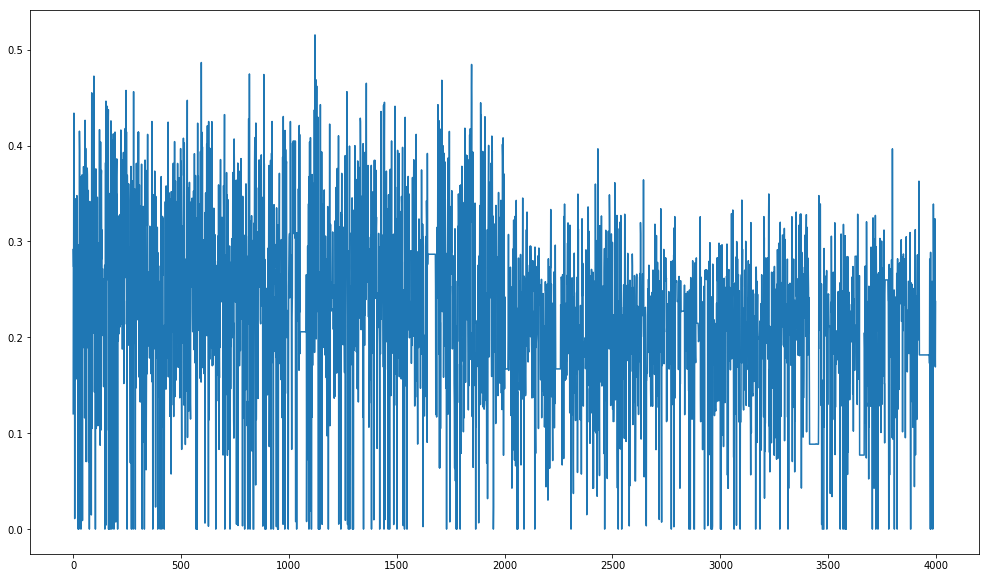

In [75]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0][1:])

Различие уже видно невооруженным взглядом, но оно не так ярко выражено. Что будем делать?

In [ ]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [ ]:
stops

In [80]:
words = [y[0] for y in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]

In [ ]:
cv.vocabulary_['работа']

In [82]:
c_words = zip(words, sum(matrix))

In [83]:
c_words = sorted(c_words, key=lambda x: x[1], reverse=True)
c_words[:25]

[('работа', 13533),
 ('опыт', 8209),
 ('компания', 5544),
 ('разработка', 5103),
 ('знание', 5060),
 ('требование', 3863),
 ('условие', 3254),
 ('медицинский', 3177),
 ('система', 2907),
 ('команда', 2868),
 ('обязанность', 2848),
 ('проект', 2704),
 ('высокий', 2598),
 ('фармацевтический', 2429),
 ('образование', 2426),
 ('возможность', 2417),
 ('офис', 2140),
 ('заработный', 2117),
 ('быть', 2048),
 ('профессиональный', 2043),
 ('наш', 2032),
 ('работать', 2032),
 ('умение', 2019),
 ('график', 1931),
 ('клиент', 1921)]

In [84]:
stop_w = [x[0] for x in c_words[:25]]
stop_w

['работа',
 'опыт',
 'компания',
 'разработка',
 'знание',
 'требование',
 'условие',
 'медицинский',
 'система',
 'команда',
 'обязанность',
 'проект',
 'высокий',
 'фармацевтический',
 'образование',
 'возможность',
 'офис',
 'заработный',
 'быть',
 'профессиональный',
 'наш',
 'работать',
 'умение',
 'график',
 'клиент']

In [ ]:
stop_w = ['работа',
 'опыт',
 'компания',
 'разработка',
 'знание',
 'требование',
 'условие',
 'медицинский',
 'система',
 'команда',
 'обязанность',
 'проект',
 'высокий',
 'фармацевтический',
 'образование',
 'возможность',
 'офис',
 'заработный',
 'быть',
 'профессиональный',
 'наш',
 'работать',
 'умение',
 'график',
 'клиент']

In [85]:
cv = CountVectorizer(tokenizer=token_r, stop_words=stop_w)

In [86]:
%%time
matrix_2 = cv.fit_transform(texts).toarray()

CPU times: user 1min 46s, sys: 580 ms, total: 1min 47s
Wall time: 1min 47s


In [ ]:
matrix.shape

In [87]:
cos_m2 = cosine_similarity(matrix_2)

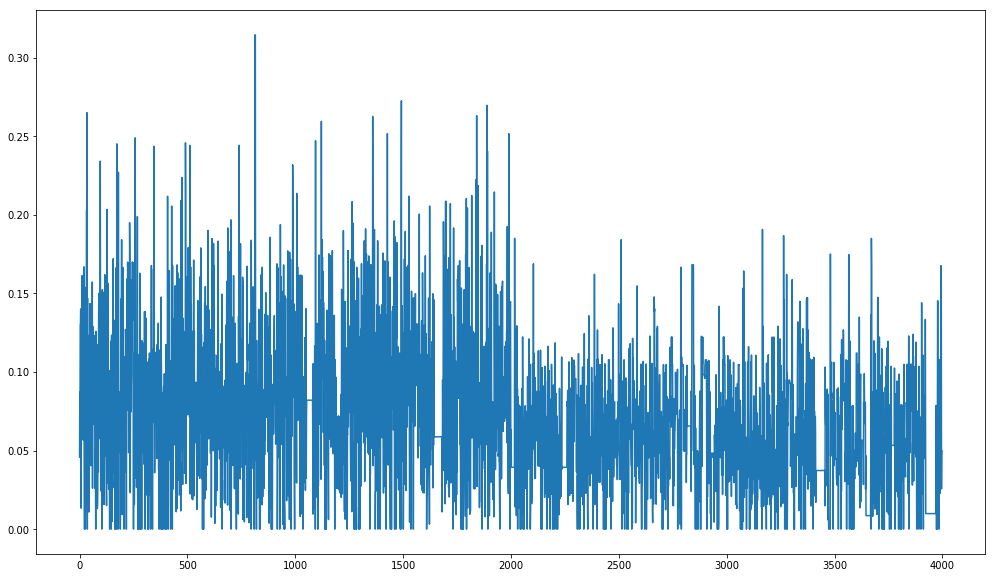

In [89]:
plt.figure(figsize=(17,10))
plt.plot(cos_m2[0][1:])

In [ ]:
plt.plot(cos_m[0][1:])

24

In [110]:
(list(range(0,24))+list(range(25,4000)))[-2:]

[3998, 3999]

In [101]:
cos_m[cos_m2[0][:2000].argmin()][list(range(0,24))+list(range(25,4000))]

array([0.        , 0.        , 0.        , ..., 0.        , 0.00542254,
       0.        ])

In [ ]:
cos_m[0][4:] + cos_m[1][4:] + cos_m[2][4:] + cos_m[3][4:] + cos_m[4][4:]/5

In [107]:
plt.figure(figsize=(17,10))
plt.plot((cos_m[0][4:] + cos_m[1][4:] + cos_m[2][4:] + cos_m[3][4:] + cos_m[cos_m2[0][:2000].argmin()][list(range(4,24))+list(range(25,4000))])/5)

ValueError: operands could not be broadcast together with shapes (3996,) (3994,) 

<Figure size 1224x720 with 0 Axes>

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('notebooks.zip', 'w')
import os
for file_ in os.listdir():
    if 'ipynb' in file_:
        zip_ref.write(file_)
zip_ref.close()

['.config',
 '.bashrc',
 '.cache',
 '.ssh',
 '.ipynb_checkpoints',
 'Lect1_tf-idf.ipynb',
 'nltk_data',
 'vac_dicts.pkl',
 'Lect1_zipf.ipynb',
 '.local',
 'notebooks.zip',
 '.bash_logout',
 'dostoevsky.txt',
 '.profile',
 '.ipython',
 'lect2_text_mining.ipynb']

Добавим отрицательных примеров

In [ ]:
sum(cos_m[:5])[5:-5]/5 - sum(cos_m[-5:])[5:-5]/5

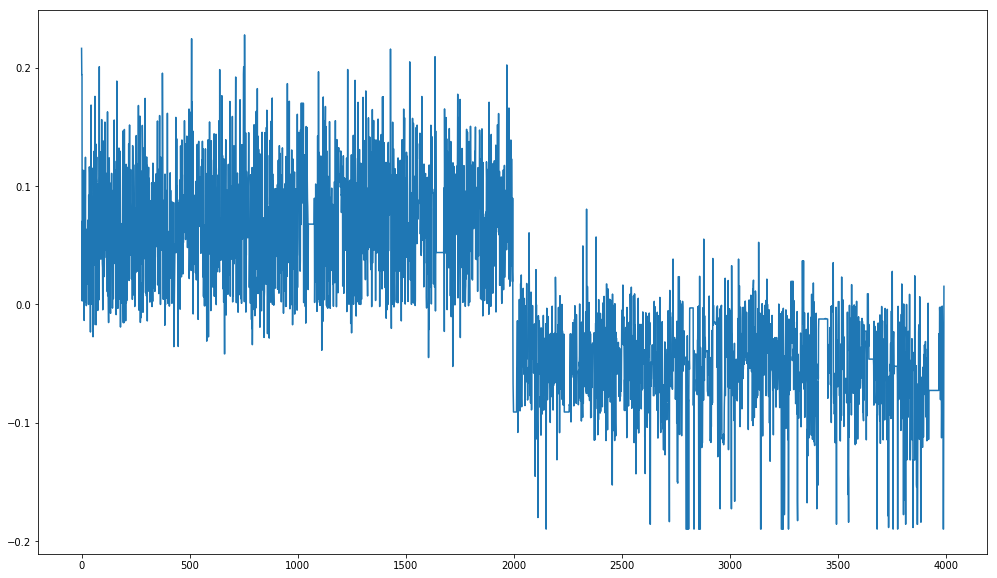

In [105]:
plt.figure(figsize=(17,10))
plt.plot(sum(cos_m[:5])[5:-5]/5 - sum(cos_m[-5:])[5:-5]/5)